Лаба 2



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

plt.rcParams["figure.figsize"] = (20, 10)

np.set_printoptions(suppress=True)

In [ ]:
from random import choices as ch
from random import sample as smp
"""
for i in range(10):
  print(ch(range(3), k=2)) # x != y || x == y
print()
for i in range(10):
  print(smp(range(3), 2)) # x != y
# work very fast: sample(range(10000000), 60)
"""

'\nfor i in range(10):\n  print(ch(range(3), k=2)) # x != y || x == y\nprint()\nfor i in range(10):\n  print(smp(range(3), 2)) # x != y\n# work very fast: sample(range(10000000), 60)\n'

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F

------------------------------------------------------

[конспекты лекций](https://github.com/itmo-ctd-y2020-36-notes/s4-notes/blob/master/MetOpt.pdf)


--------------------------
[про вычисление градиента](http://qilab.phys.msu.ru/people/zadkov/teaching/seminar1/semnumer1.pdf)

--------------------------
https://habr.com/ru/post/318970/

--------------------------
https://pypi.org/project/psutil/

In [ ]:
def f(F, Y, A):
    sum_diff = 0
    for i in range(len(Y)):
        sum = 0
        for j in range(len(A)):
            sum += F[i][j] * A[j]
        sum_diff += (sum - Y[i]) ** 2
    return sum_diff

from random import shuffle

def gradForOne(F, Y, A, i, lr):
    A_delta = A.copy()
    A_delta2 = A.copy()
    A_delta[i] += lr
    A_delta2[i] -= lr
    return -(f(F, Y, A_delta) - f(F, Y, A_delta2)) / (2 * lr)

mix = None
k_mix = 0


def getMix(n, l, r):
    global mix
    if (r > n):
        return mix[l:] + mix[:r - len(mix)]
    else:
        return mix[l:r]


def gradOnBatch(F, Y, A, batch, n, lr):
    global mix, k_mix
    A_new = A.copy()
    for i in getMix(n, k_mix, k_mix + batch):
        A_new[i] += lr * gradForOne(F, Y, A, i, lr)
    k_mix = (k_mix + batch) % n
    return A_new


def sgd_1(F, Y, A, lr, batch_size, dimensions_amount, points_amount, max_iterations, epsilon):
    global mix, k_mix
    k_mix = 0
    mix = list(range(n))
    shuffle(mix)
    batch_size = min(dimensions_amount, max(1, batch_size))
    iterations_spent = 0

    planes = np.zeros((1, dimensions_amount))
    A_zn = f(F, Y, A)
    val = np.array([A_zn])

    planes[0] = A
    A = gradOnBatch(F, Y, A, batch_size, dimensions_amount, lr)
    A_zn = f(F, Y, A)

    planes = np.append(planes, [A], axis=0)
    val = np.append(val, [A_zn])

    while abs(val[-2] - val[-1]) > epsilon:
        if iterations_spent >= max_iterations:
            print("Can't reach defined precision. It takes more than {} iterations".format(max_iterations))
            break
        A = gradOnBatch(F, Y, A, batch_size, dimensions_amount, lr)
        A_zn = f(F, Y, A)

        planes = np.append(planes, [A], axis=0)
        val = np.append(val, [A_zn])
        iterations_spent += 1

    return A, planes, val

In [ ]:
def print_convergence(planes, F, Y, title):
    t = np.linspace(0, 10, 200) #для ускорения можно уменьшить третье до 100
    X, YY = np.meshgrid(t, t)
    plt.figure()
    plt.contour(X, YY, f(F, Y, [X, YY]), levels=sorted([f(F, Y, p) for p in planes]))
    plt.plot(planes[:, 0], planes[:, 1], '-')
    for i in range(len(planes)):
        plt.plot(planes[i, 0], planes[i, 1], 'o-', color=cm.RdYlGn(i / len(planes)))
    plt.title(title + "\n Minimum found: " + str(round(f(F, Y, planes[-1]), 10)))
    plt.show()

In [ ]:
from random import uniform


def arrayRandom(n, down: int, up: int):
    #global HUp, WUp, HDown, WDown
    return np.array([uniform(down, up) for i in range(n)])


def arrayNotRandom(A, epsilon):
    #global HUp, WUp, HDown, WDown
    return np.array([uniform(i - epsilon, i + epsilon) for i in A])


def construct(n, l, EPSILON_Y, left, right, ans=None):
    A_gen = np.array([uniform(left, right) for i in range(n)])  # Рандомный сгенерированный ответ
    if (ans != None):  # Свой сгенерированный ответ
        for i in range(len(ans)):
            A_gen[i] = ans[i]

    A_start = np.zeros(n)  # начальный вектор коэффициентов
    #Y = arrayRandom(l, 0, 20) # значение функции (Положение точки)
    Y = np.zeros(l)
    F = np.array([arrayRandom(n, left, right) for i in range(l)])  #
    #F[0] = np.linspace(1, 1, n)
    for i in range(l):
        F[i][0] = 1  # Свободный член
        getting_sum = sum(F[i] * A_gen)
        Y[i] = uniform(getting_sum - EPSILON_Y, getting_sum + EPSILON_Y)
    #print(A_gen)
    #print(Y)
    #print(F)
    return F, Y, A_start, A_gen

In [ ]:
EPSILON_Y = 20
n = 2 # размерность
l = 20 # кол-во точек
F, Y, A_start, A_gen = construct(n, l, EPSILON_Y, 0, 20, [7, 4])



[7. 4.]
[79.81786891 90.51536433 16.66475444 26.70006951 27.96862469  7.182709
 77.54067263 51.18336335 29.18044797 38.46020751 25.53137529 79.31794359
 79.50628748 28.98337642 35.14600943 29.31209856 20.05153727 92.93642974
 54.85106848 39.77702693]
[[ 1.         16.71414251]
 [ 1.         16.77407179]
 [ 1.          4.12622221]
 [ 1.          9.50621963]
 [ 1.          7.83681473]
 [ 1.          4.38972855]
 [ 1.         19.5340127 ]
 [ 1.         10.18638531]
 [ 1.          9.62643925]
 [ 1.          5.46125488]
 [ 1.          5.16591755]
 [ 1.         13.66822263]
 [ 1.         18.38115266]
 [ 1.          3.30342305]
 [ 1.          7.27570358]
 [ 1.          9.14903965]
 [ 1.          2.1345128 ]
 [ 1.         18.37039449]
 [ 1.          9.4220099 ]
 [ 1.         11.6502907 ]]


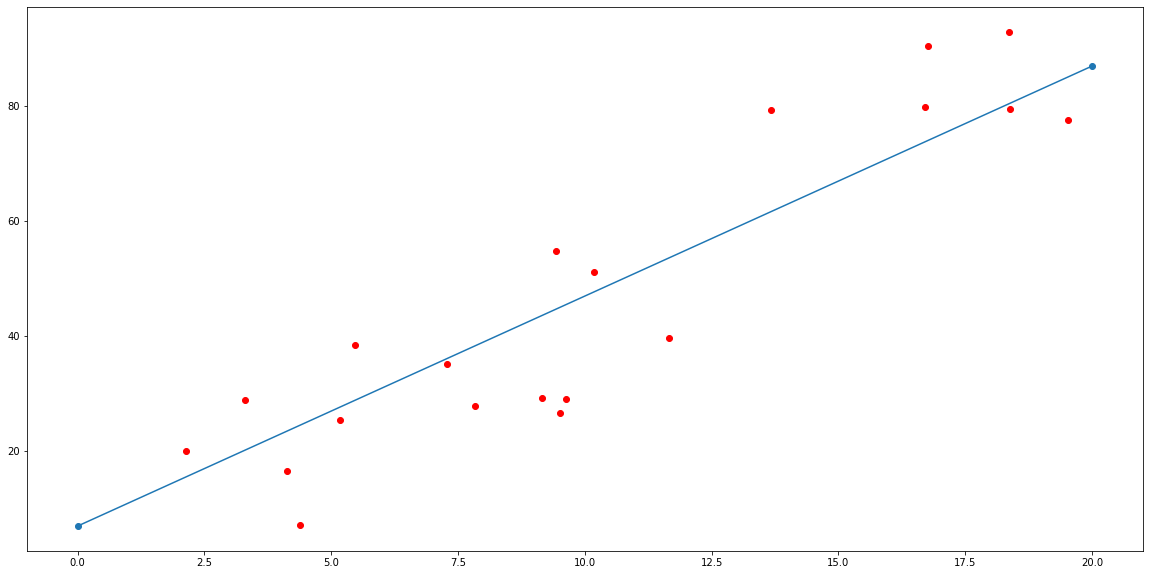

In [ ]:
print(A_gen)
print(Y)
print(F)

# 2d only
plt.plot(F[:, 1], Y, "ro")
plt.plot([0, 20], [A_gen[0], A_gen[0]+20*A_gen[1]], "o-")
plt.show()

[0.17452603 4.54997456]
[2475.04145755 2474.76831074 2450.52431848 2450.44113649 2445.00470989
 2444.9732617  2443.75734286 2443.74180739 2443.4713334  2443.4614084 ]
[[0.16238739 4.4466132 ]
 [0.16761897 4.4466132 ]
 [0.16761897 4.5039371 ]
 [0.17050599 4.5039371 ]
 [0.17050599 4.53108214]
 [0.17228113 4.53108214]
 [0.17228113 4.54391981]
 [0.17352879 4.54391981]
 [0.17352879 4.54997456]
 [0.17452603 4.54997456]]


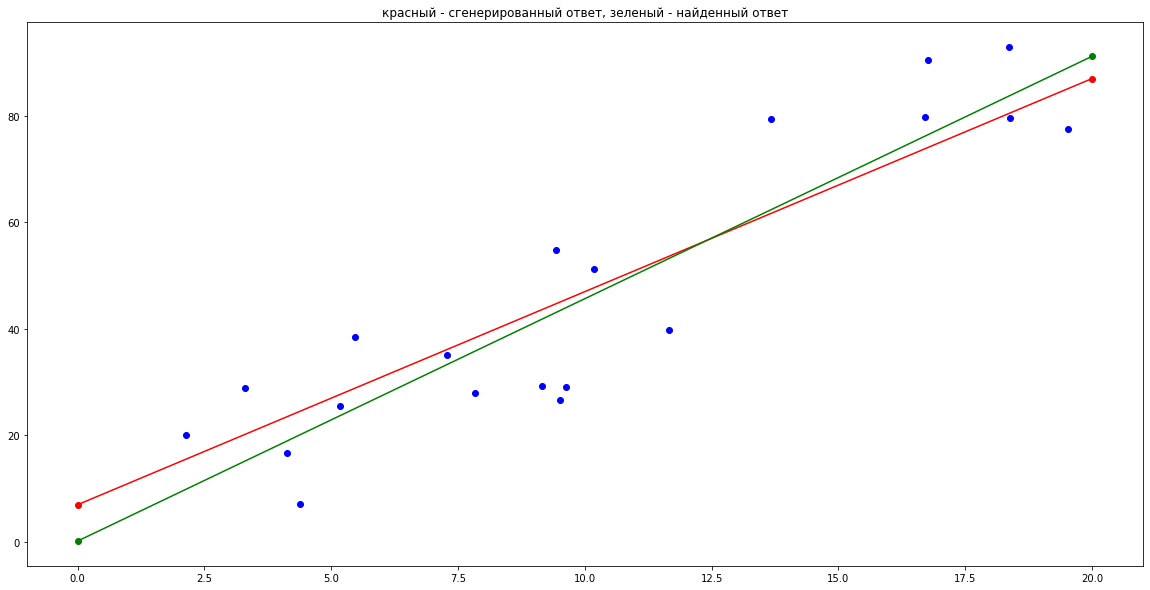

In [ ]:
lr = 0.0001  # шаг
batch = 1  # размер батча
iter = 1000  # макс.количество итераций
epsilon = 0.01  # До какой точности будет разница функций

A_curr, planes, val = sgd_1(F, Y, A_start, lr, batch, n, l, iter, epsilon)
nomod = planes
print(A_curr)
#print()
# print(ma)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])

plt.plot(F[:, 1], Y, "bo")
plt.plot([0, 20], [A_gen[0], A_gen[0] + 20 * A_gen[1]], "or-")
plt.plot([0, 20], [A_curr[0], A_curr[0] + 20 * A_curr[1]], "og-")
plt.title("красный - сгенерированный ответ, зеленый - найденный ответ") 
plt.show()

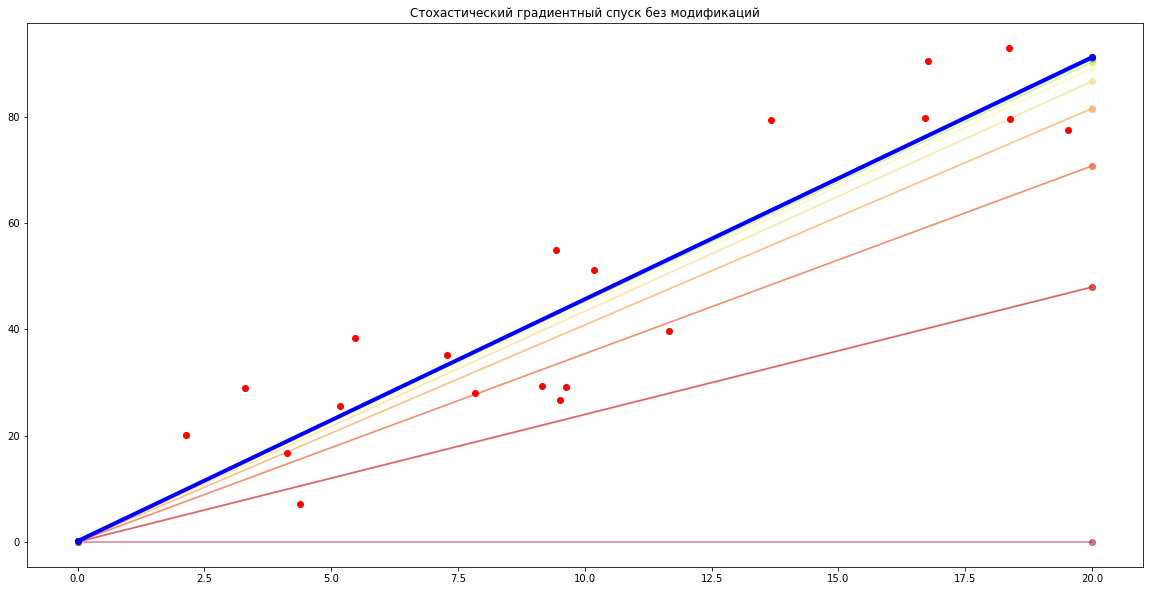

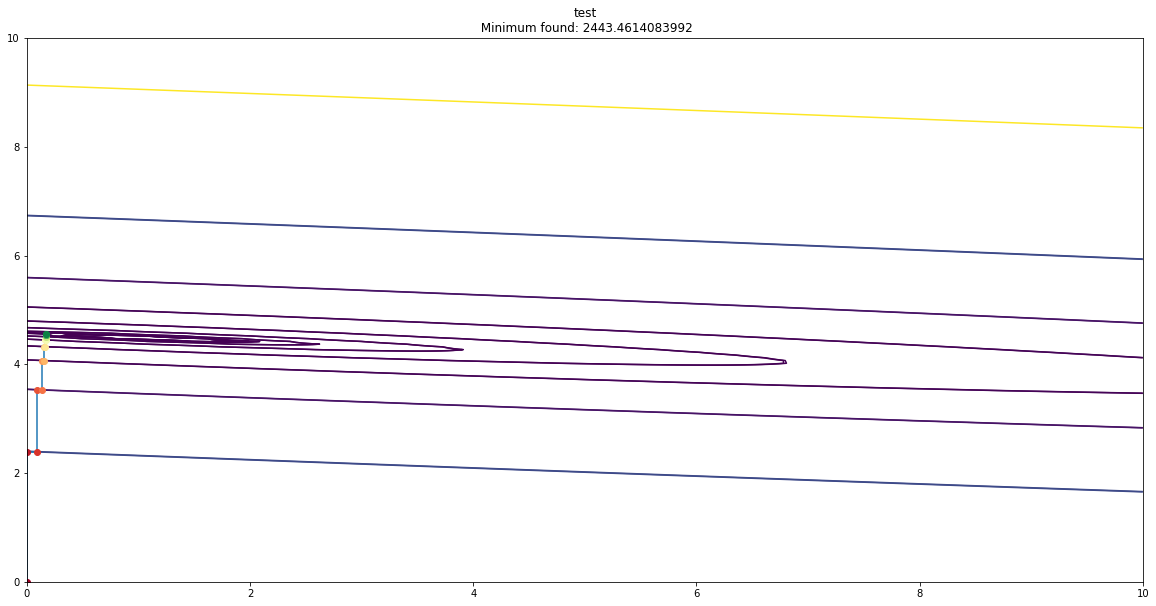

In [ ]:
for i in range(0, len(planes)):
    plt.plot([0, 20], [planes[i, 0], planes[i, 0] + 20 * planes[i, 1]], "o-", color=cm.RdYlGn(i / len(planes)), alpha=0.5)
plt.title("Стохастический градиентный спуск без модификаций")
plt.plot([0, 20], [A_curr[0], A_curr[0] + 20 * A_curr[1]], "ob-", linewidth=4)
plt.plot(F[:, 1], Y, "ro")
plt.show()
print_convergence(planes, F, Y, "test")

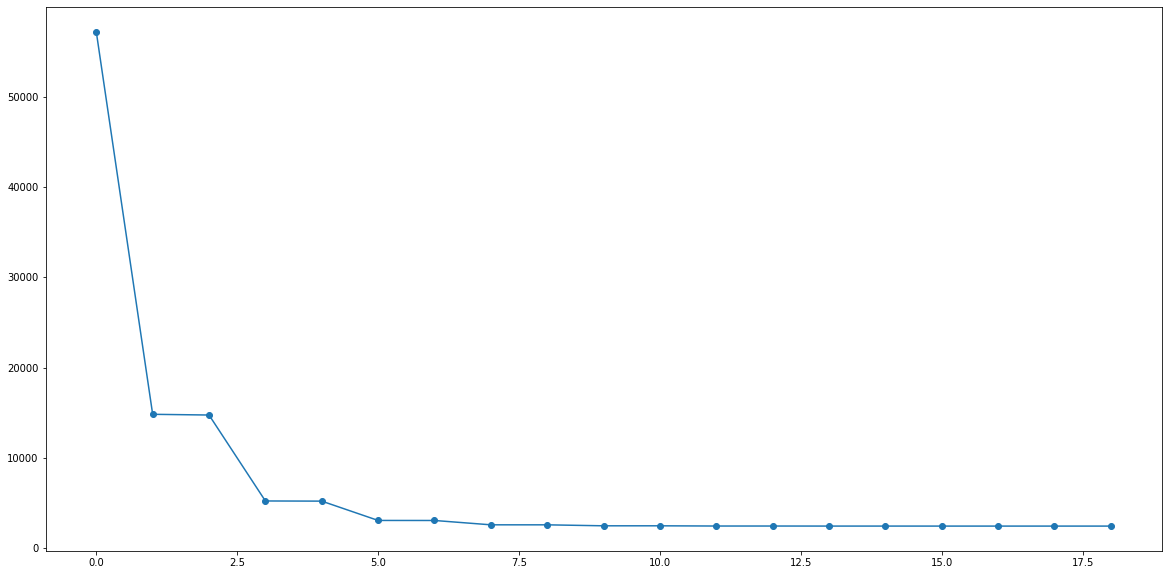

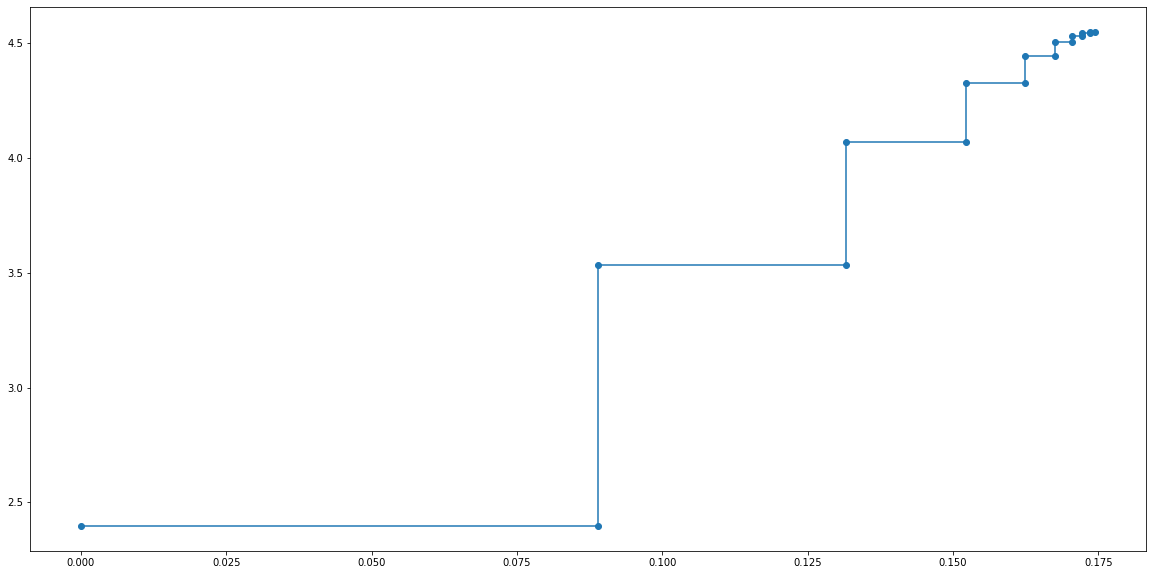

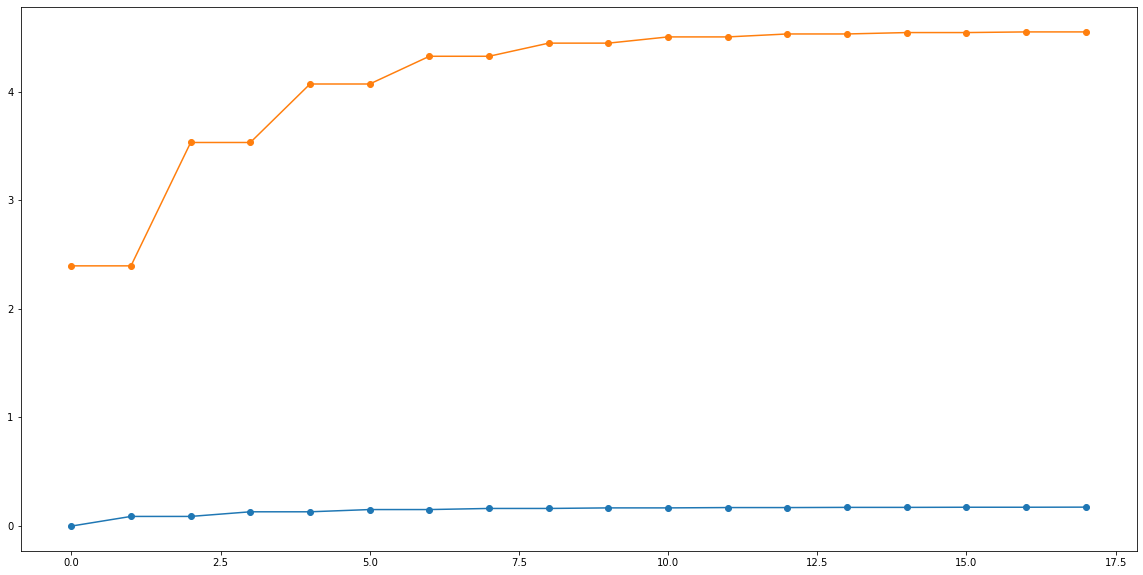

In [ ]:
# 2d only

plt.plot(val, 'o-')
plt.show()

plt.plot(planes[:, 0][1:], planes[:, 1][1:], 'o-', )
plt.show()

plt.plot(planes[:, 0][1:], 'o-')
plt.plot(planes[:, 1][1:], 'o-')
plt.show()

## 2 задание

Попробуем минмакс

[-0.04181916  0.99138112]
[0.33711534 0.33699719 0.33688167 0.33676871 0.33665826 0.33655026
 0.33644467 0.33634141 0.33624046 0.33614174]
[[-0.03868176  0.98553493]
 [-0.03904622  0.98621407]
 [-0.03940662  0.98688563]
 [-0.03976299  0.98754968]
 [-0.04011538  0.98820632]
 [-0.04046383  0.98885562]
 [-0.04080839  0.98949767]
 [-0.04114911  0.99013255]
 [-0.04148602  0.99076034]
 [-0.04181916  0.99138112]]


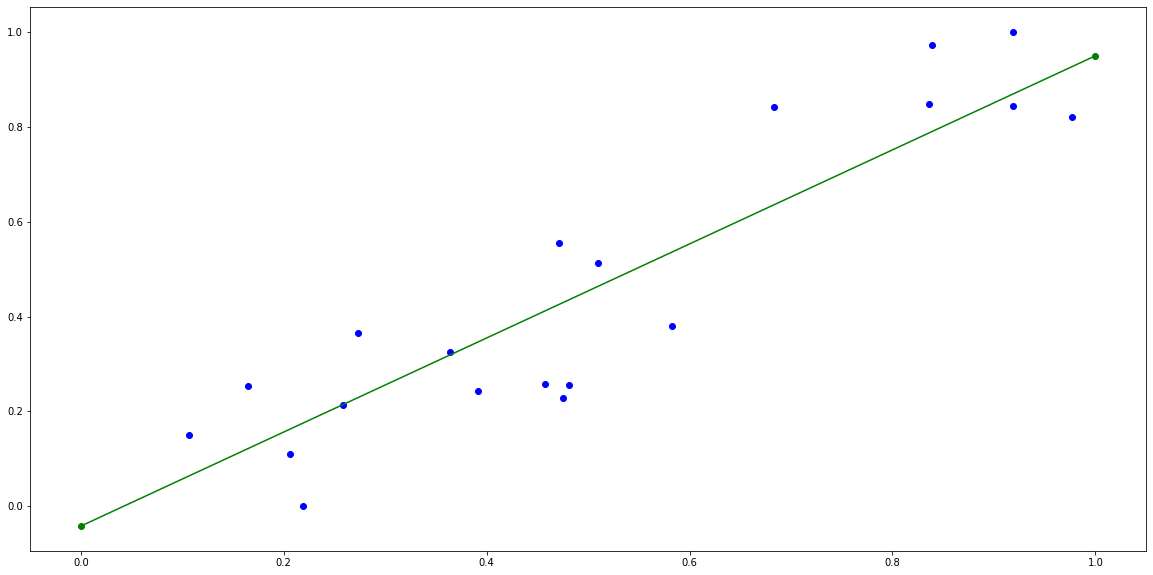

In [ ]:
min_Y = min(Y)
max_Y = max(Y)
Y_new = (Y - min_Y) / (max_Y-min_Y)
F_new = F.copy().T
for i in range(1, len(F_new)):
    F_new[i] = (F_new[i] - 0) / (20 - 0)
F_new = F_new.T

lr = 0.005  # шаг
batch = 2  # размер батча
iter = 1000  # макс.количество итераций
epsilon = 0.0001  # До какой точности будет разница функций

A_curr, planes, val = sgd_1(F_new, Y_new, A_start, lr, batch, n, l, iter, epsilon)
print(A_curr)
# print(val)
# print(planes)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])

Ans = np.array([A_curr[0], A_curr[0] + A_curr[1]])

plt.plot(F_new[:, 1], Y_new, "bo")
plt.plot([0, 1], Ans, "og-")
plt.show()

7.18270899653801
92.93642973664981
[-0.04181916  0.99138112]


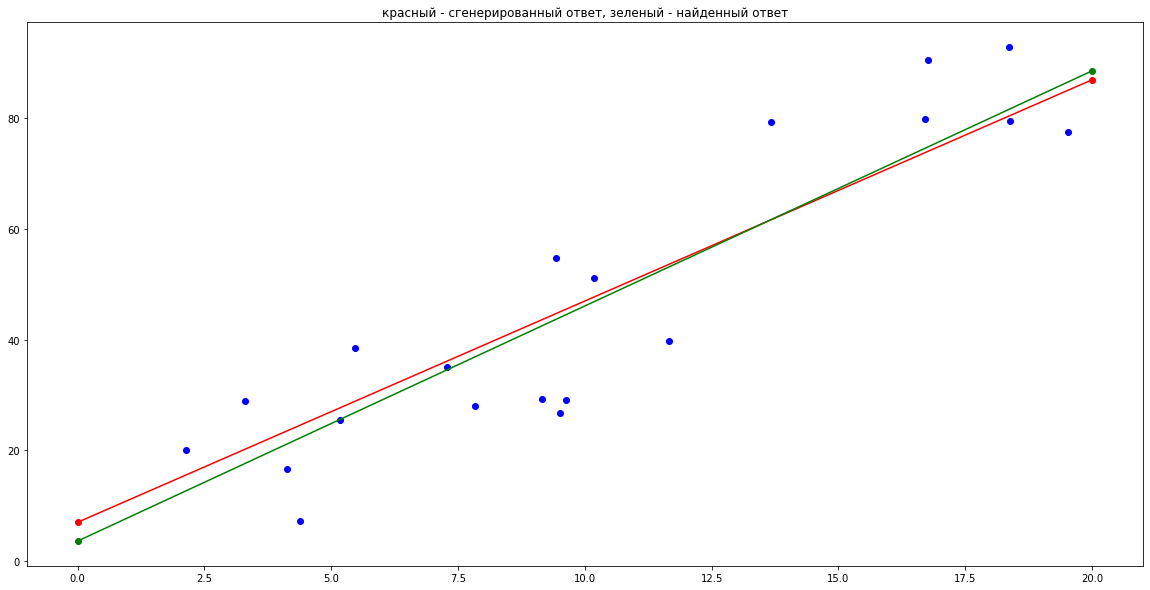

In [ ]:
Ans = min_Y + Ans*(max_Y - min_Y)
print(min_Y)
print(max_Y)
print(A_curr)
plt.plot(F[:, 1], Y, "bo")
plt.plot([0, 20], [A_gen[0], A_gen[0] + 20 * A_gen[1]], "or-")
plt.plot([0, 20], Ans, "og-")
plt.title("красный - сгенерированный ответ, зеленый - найденный ответ") 
plt.show()

### 3 Задание

In [ ]:
def gradForOne(F, Y, A, i, lr):
    # надо вернуть шаг только для одной переменной, как в первой лабе, однако в первой лабе возвращали массив шагов
    A_delta = A.copy()
    A_delta2 = A.copy()
    A_delta[i] += lr
    A_delta2[i] -= lr
    return (f(F, Y, A_delta) - f(F, Y, A_delta2)) / (2 * lr)
    # ((f + h) - (f - h)) / 2h - точнее, только кверх ногами
    # ((f - h) - (f + h)) / 2h - а заработало только так...

def getMix(mix, l, r):
    if (r > len(mix)):
        return mix[l:]+mix[:r-len(mix)]
    else:
        return mix[l:r]

def gradOnBatch(F, Y, A, mix, k_mix, batch, lr):
    A_new = A.copy()
    for i in getMix(mix, k_mix, k_mix + batch):
        A_new[i] += lr * gradForOne(F, Y, A, i, lr)
    return A_new

def sgd_3(F, Y, A, fGrad, n, lr, batch=n, max_iterations=300, epsilon=0.1):
    batch = min(n, max(1, batch))
    from random import shuffle
    k_mix = 0
    mix = list(range(n))
    shuffle(mix)

    points = np.array([A])
    val = np.array([f(F, Y, A)])

    A = fGrad(F, Y, A, mix, k_mix, batch, lr, 0)
    k_mix = (k_mix + batch) % n
    points = np.append(points, [A], axis=0)
    val = np.append(val, [f(F, Y, A)])
    iter = 1

    while abs(val[-2] - val[-1]) > epsilon: # по значению функции
        if iter >= max_iterations:
            print("Can't reach defined precision. It takes more than {} iterations".format(max_iterations))
            break
        
        A = fGrad(F, Y, A, mix, k_mix, batch, lr, iter)
        k_mix = (k_mix + batch) % n

        points = np.append(points, [A], axis=0)
        val = np.append(val, [f(F, Y, A)])
        iter += 1

    return points, val

In [ ]:
M = 0
G = 0
beta = 0.9
beta2 = 0.999

#Память: G: n; beta: 1 -- O(n+1)
#Кол-во операций на одной итерации: 2 + n + 1 + n + (n + n) = O(5n + 3) - 2 операции на проверку
def fGradMomentum(F, Y, A, mix, k_mix, batch, lr, iter):
    global G, beta
    if not (0 < beta < 1):
        raise
    G = beta * G + (1 - beta) * gradOnBatch(F, Y, A, mix, k_mix, batch, lr)
    return A - lr * G

#Память: G: n; beta: 1 -- O(n+1)
#Кол-во операций на одной итерации: 2 + 5n + (2n) = O(7n + 2) - 2 операции на проверку
def fGradNesterov(F, Y, A, mix, k_mix, batch, lr, iter):
    global G, beta
    if not (0 < beta < 1):
        raise
    G = beta * G + lr * gradOnBatch(F, Y, A - beta * G, mix, k_mix, batch, lr)
    return A - lr * G

#Память: G: n -- O(n)
#Кол-во операций на одной итерации: n + n + 1 + (5n) = O(7n + 1)
def fGradAdaGrad(F, Y, A, mix, k_mix, batch, lr, iter):
    global G

    grad = gradOnBatch(F, Y, A, mix, k_mix, batch, lr)
    G = G + grad**2

    e = 10**-8
    return A - (lr / (G + e)**0.5) * grad

#Память: G: n; beta: 1 -- O(n+1)
#Кол-во операций на одной итерации: 2 + 4n + 1 + (5n) = O(9n + 3) - 2 операции на проверку
def fGradRMSProp(F, Y, A, mix, k_mix, batch, lr, iter):
    global G, beta
    if not (0 < beta < 1):
        raise

    grad = gradOnBatch(F, Y, A, mix, k_mix, batch, lr)
    G = beta*G + (1-beta)*grad**2

    e = 10**-8
    return A - (lr / (G + e)**0.5) * grad

#Память: O(2n + 2)
#Кол-во операций на одной итерации: 4 + (2n+1) + (3n+1) + 2 + (7n + 4) = O(12n + 12) - 4 операции на проверку
def fGradAdam(F, Y, A, mix, k_mix, batch, lr, iter):
    global G, M, beta, beta2
    if not (0 < beta < 1):
        raise
    if not (0 < beta2 < 1):
        raise
    grad = gradOnBatch(F, Y, A, mix, k_mix, batch, lr)
    M = beta*M + (1-beta)*grad
    G = beta2*G + (1-beta2)*grad**2

    t = iter + 1
    e = 10**-8
    return A - (lr / (G / (1-beta2**t) + e)**0.5) * M / (1-beta**t)

In [ ]:
from time import process_time

0.015674041000004024 seconds, 95 iterations, 0.00016498990526320025 on one iterations in middle
[2447.33595721 2452.07454512 2456.22368755 2464.67357589 2468.28627276
 2476.85018897 2475.99634952 2480.5688722  2474.65345524 2474.64388468]
[[0.31735394 4.50081986]
 [0.3186315  4.48338038]
 [0.31914405 4.47148654]
 [0.32040557 4.4518391 ]
 [0.32090013 4.44460877]
 [0.32257495 4.42921226]
 [0.32343713 4.43056423]
 [0.3256614  4.42291988]
 [0.32701191 4.43253128]
 [0.32963091 4.43231647]]


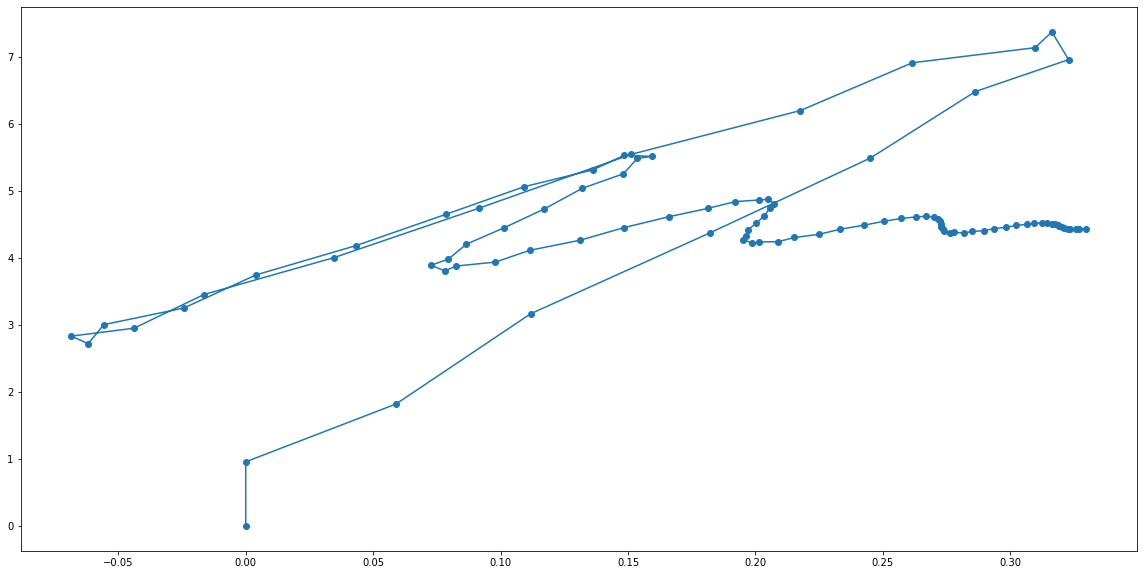

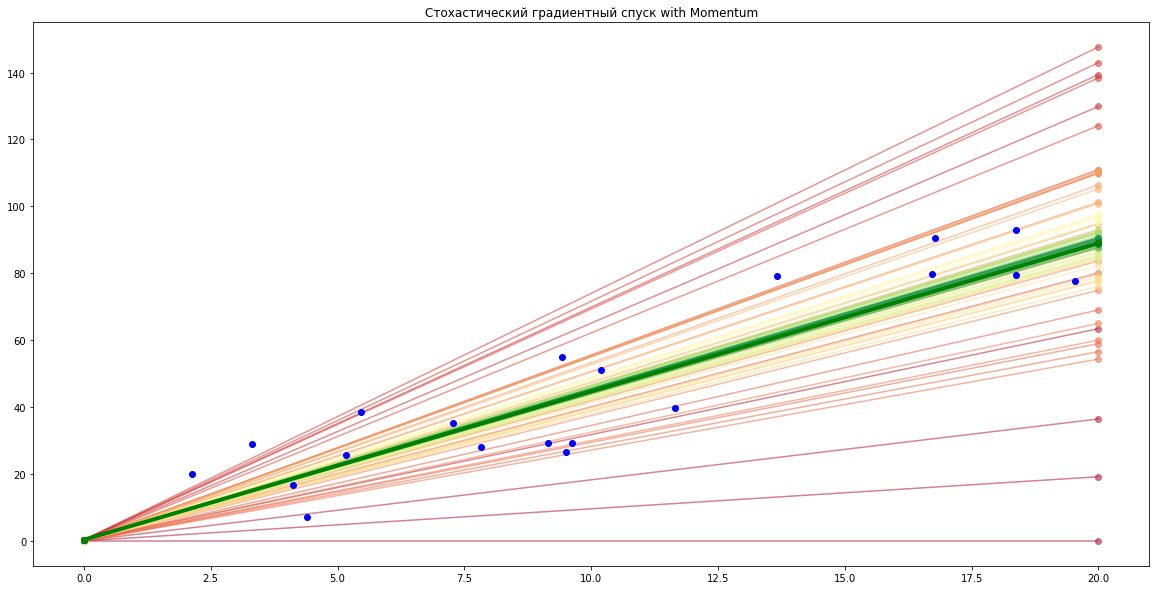

In [ ]:
G = 0
beta = 0.9
fGrad = fGradMomentum
n = 2
lr = 0.02 # Нужно тщательно подбирать шаг
A = np.zeros(n)
batch = 1
iter = 1000
beta = 0.9

start_time = process_time()
points, val = sgd_3(F, Y, A, fGrad, n, lr, batch, iter)
end_time = process_time()
momentum_time = "{} seconds, {} iterations, {} on one iterations in middle".format(end_time - start_time, len(val), (end_time - start_time) / len(val))
print(momentum_time)

momentum = points
np.set_printoptions(suppress=True)
print(val[-min(10, len(val)):])
print(points[-min(10, len(points)):])

plt.plot(points[:, 0], points[:, 1], 'o-', )
# print_convergence(points, F, Y, "test")
plt.show()

for i in range(0, len(points)):
    plt.plot([0, 20], [points[i, 0], points[i, 0] + 20 * points[i, 1]], "o-", color=cm.RdYlGn(i / len(points)), alpha=0.5)
plt.title("Стохастический градиентный спуск with Momentum")
plt.plot([0, 20], [points[-1][0], points[-1][0] + 20 * points[-1][1]], "go-", linewidth=4)
plt.plot(F[:, 1], Y, "bo")
plt.show()

0.06816745100000077 seconds, 307 iterations, 0.00022204381433225004 on one iterations in middle
[2491.41636048 2491.25282438 2490.30106943 2490.15503349 2489.23094356
 2489.10154426 2488.20393648 2488.09035586 2487.21810353 2487.11956667]
[[0.1591524  4.42140163]
 [0.15930127 4.42161935]
 [0.1593974  4.4229625 ]
 [0.15954506 4.42315803]
 [0.15964006 4.42447726]
 [0.15978652 4.42465125]
 [0.1598804  4.42594726]
 [0.16002569 4.42610034]
 [0.16011849 4.42737381]
 [0.16026263 4.42750659]]


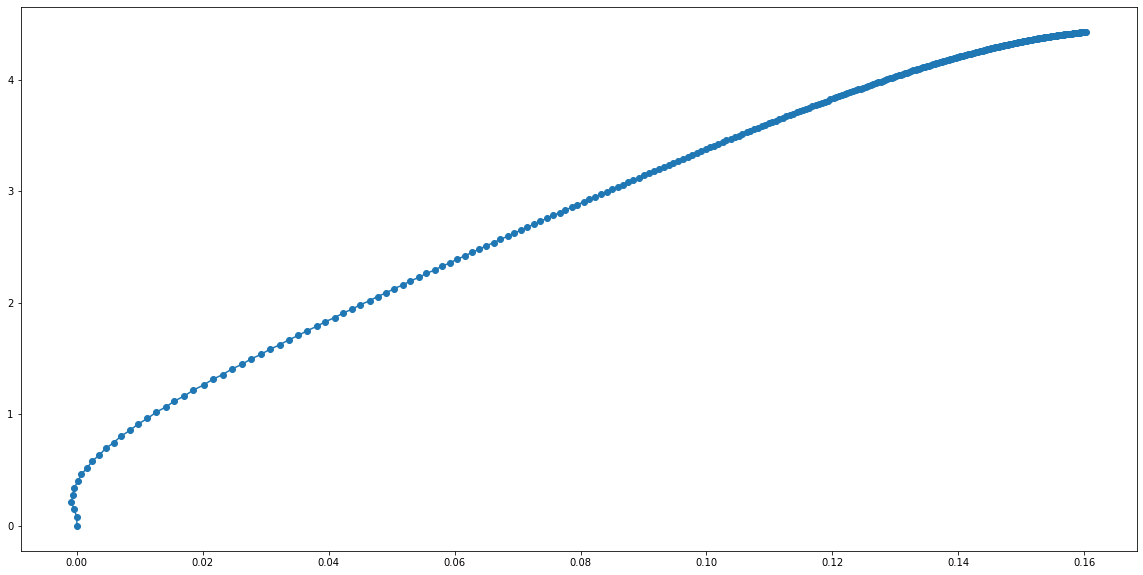

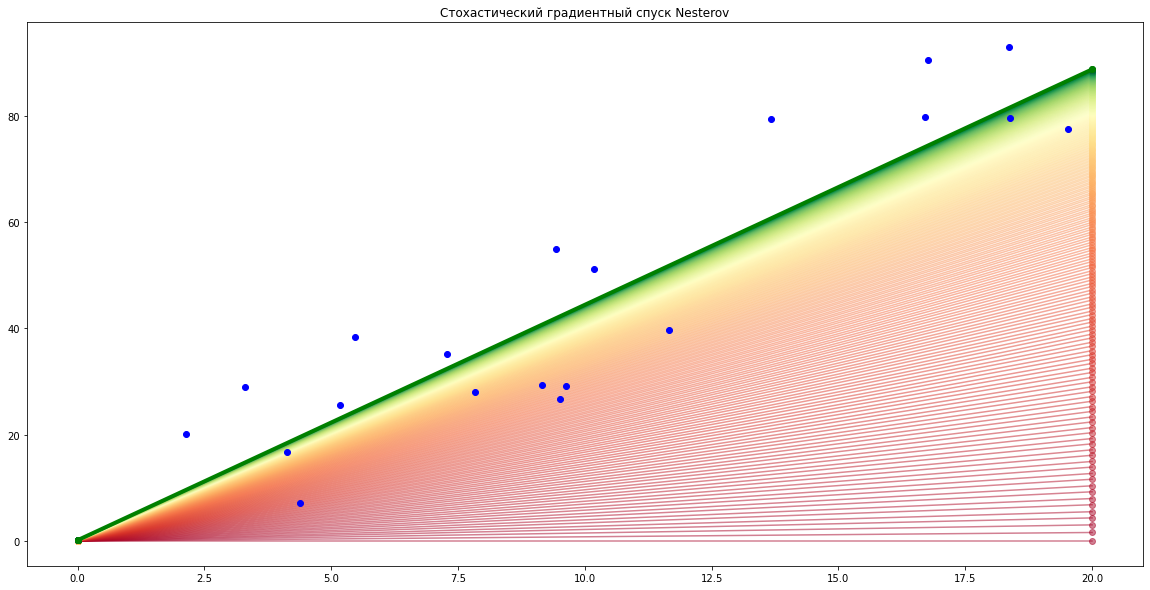

In [ ]:
G = 0
beta = 0.9
A = np.zeros(n)
fGrad = fGradNesterov
lr = 0.015 # Нужно тщательно подбирать шаг

start_time = process_time()
points, val = sgd_3(F, Y, A, fGrad, n, lr, batch, iter)
end_time = process_time()
nesterov_time = "{} seconds, {} iterations, {} on one iterations in middle".format(end_time - start_time, len(val), (end_time - start_time) / len(val))
print(nesterov_time)

nesterov = points
np.set_printoptions(suppress=True)
print(val[-min(10, len(val)):])
print(points[-min(10, len(points)):])

plt.plot(points[:, 0], points[:, 1], 'o-', )
plt.show()

for i in range(0, len(points)):
    plt.plot([0, 20], [points[i, 0], points[i, 0] + 20 * points[i, 1]], "o-", color=cm.RdYlGn(i / len(points)), alpha=0.5)
plt.title("Стохастический градиентный спуск Nesterov")
plt.plot([0, 20], [points[-1][0], points[-1][0] + 20 * points[-1][1]], "go-", linewidth=4)
plt.plot(F[:, 1], Y, "bo")
plt.show()

0.1311151680000009 seconds, 594 iterations, 0.00022073260606060756 on one iterations in middle
[2716.47111016 2716.36227078 2712.85499088 2712.74900993 2709.29455325
 2709.1913748  2705.78891708 2705.68848618 2702.33721639 2702.23947905]
[[3.7481383  3.9732487 ]
 [3.74966137 3.9732209 ]
 [3.74931324 3.97543743]
 [3.75081882 3.97540962]
 [3.7504706  3.97760928]
 [3.75195882 3.97758145]
 [3.75161049 3.97976439]
 [3.7530815  3.97973655]
 [3.75273308 3.98190289]
 [3.75418701 3.98187503]]


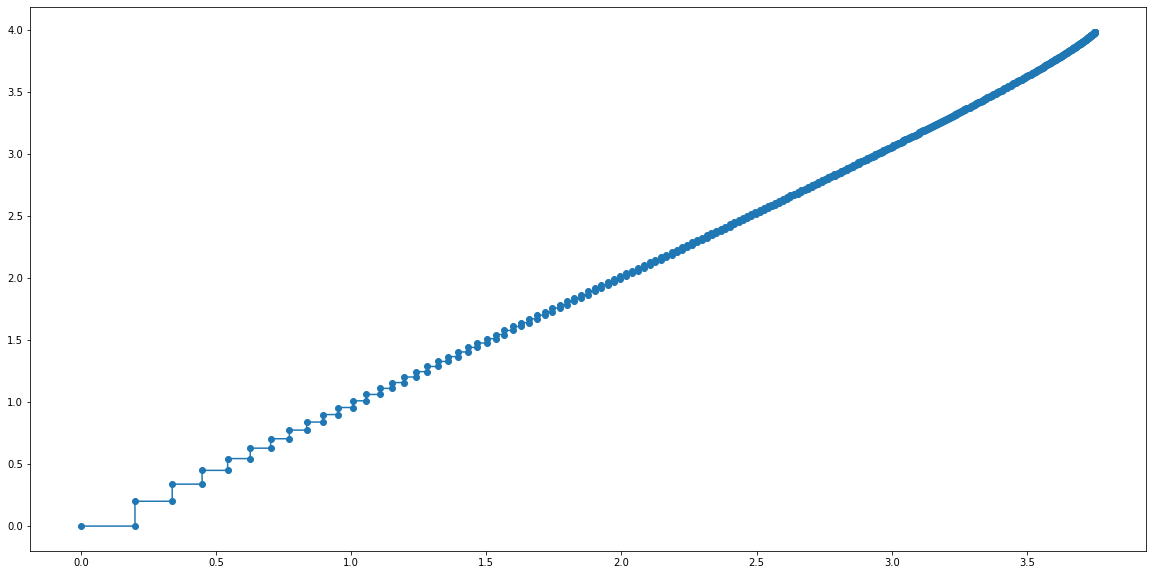

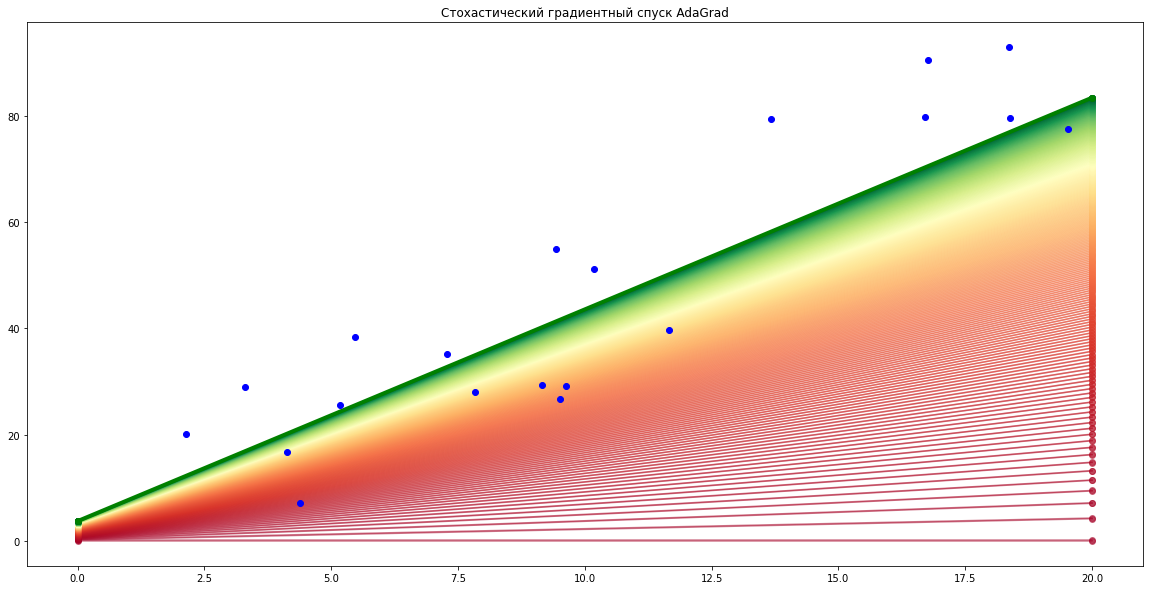

In [ ]:
G = 0
A = np.zeros(n)
fGrad = fGradAdaGrad
lr = 0.2
iter = 1000

start_time = process_time()
points, val = sgd_3(F, Y, A, fGrad, n, lr, batch, iter)
end_time = process_time()
ada_time = "{} seconds, {} iterations, {} on one iterations in middle".format(end_time - start_time, len(val), (end_time - start_time) / len(val))
print(ada_time)

ada = points
print(val[-min(10, len(val)):])
print(points[-min(10, len(points)):])

plt.plot(points[:, 0], points[:, 1], 'o-', )
plt.show()

for i in range(0, len(points)):
    plt.plot([0, 20], [points[i, 0], points[i, 0] + 20 * points[i, 1]], "o-", color=cm.RdYlGn(i / len(points)), alpha=0.5)
plt.title("Стохастический градиентный спуск AdaGrad")
plt.plot([0, 20], [points[-1][0], points[-1][0] + 20 * points[-1][1]], "go-", linewidth=4)
plt.plot(F[:, 1], Y, "bo")
plt.show()

0.05012198599999351 seconds, 207 iterations, 0.0002421351980676015 on one iterations in middle
[2445.99468387 2445.61103342 2446.32830514 2446.03471195 2446.63309139
 2446.41713093 2446.90451136 2446.75577956 2447.14026782 2447.05044742]
[[0.14345532 4.52775423]
 [0.12969287 4.58556495]
 [0.10054103 4.53118573]
 [0.08996758 4.58929838]
 [0.06281625 4.53421336]
 [0.055557   4.59254941]
 [0.03025895 4.53683645]
 [0.02640907 4.59533839]
 [0.00268747 4.5390664 ]
 [0.00231053 4.59769679]]


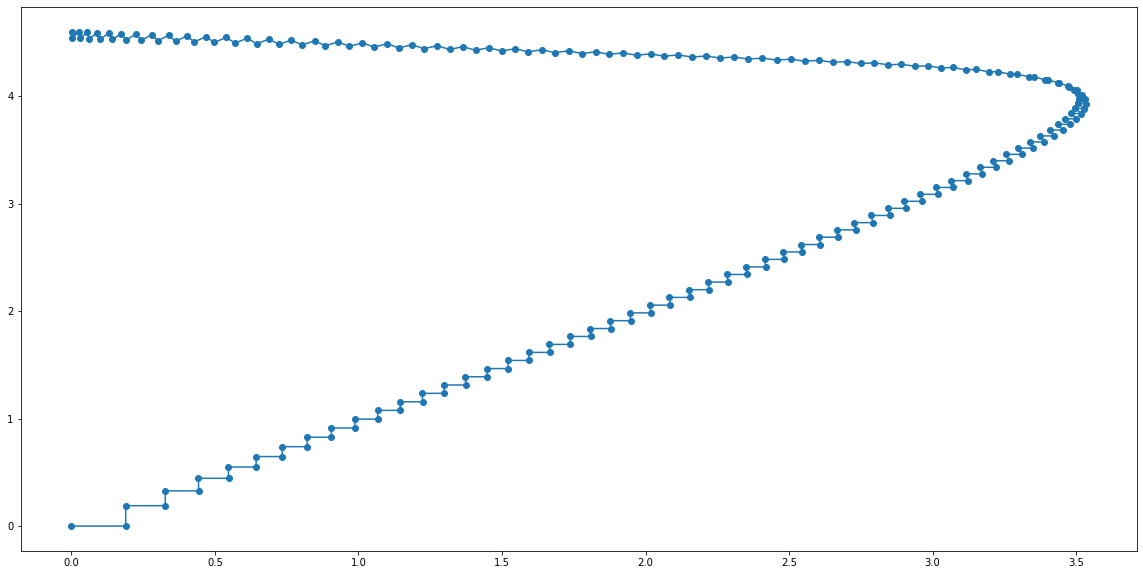

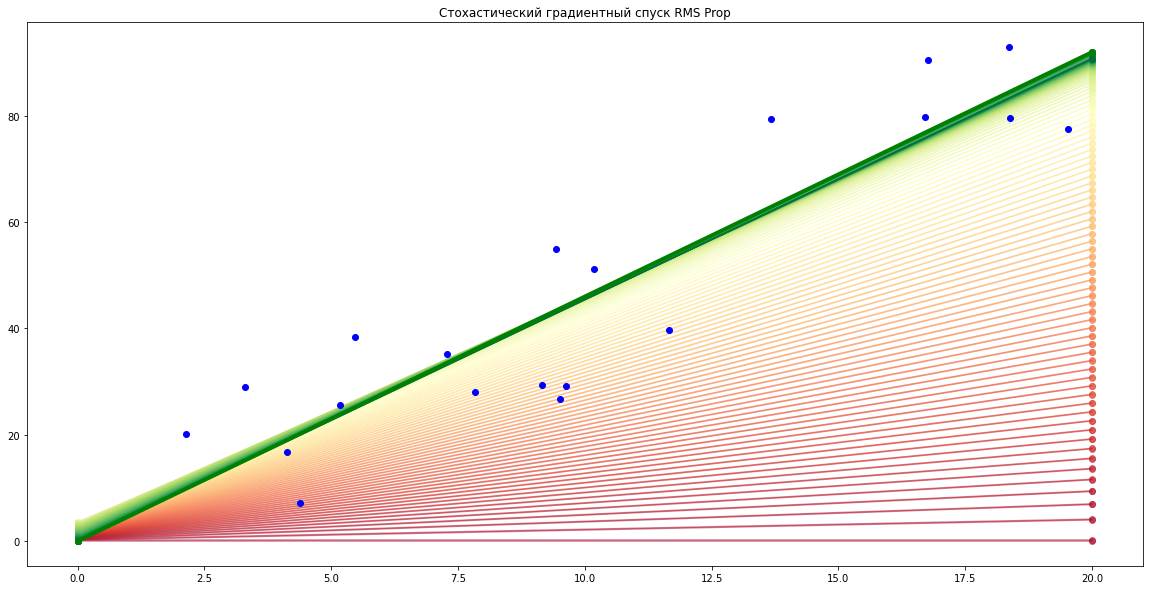

In [ ]:
G = 0
beta = 0.9
A = np.zeros(n)
fGrad = fGradRMSProp
lr = 0.06
iter = 1000

start_time = process_time()
points, val = sgd_3(F, Y, A, fGrad, n, lr, batch, iter)
end_time = process_time()
rms_time = "{} seconds, {} iterations, {} on one iterations in middle".format(end_time - start_time, len(val), (end_time - start_time) / len(val))
print(rms_time)

rms = points
print(val[-min(10, len(val)):])
print(points[-min(10, len(points)):])

plt.plot(points[:, 0], points[:, 1], 'o-', )
plt.show()

for i in range(0, len(points)):
    plt.plot([0, 20], [points[i, 0], points[i, 0] + 20 * points[i, 1]], "o-", color=cm.RdYlGn(i / len(points)), alpha=0.5)
plt.title("Стохастический градиентный спуск RMS Prop")
plt.plot([0, 20], [points[-1][0], points[-1][0] + 20 * points[-1][1]], "go-", linewidth=4)
plt.plot(F[:, 1], Y, "bo")
plt.show()

0.07460579300000347 seconds, 314 iterations, 0.00023759806687899195 on one iterations in middle
[2459.89947467 2459.79400036 2459.65529924 2459.55162249 2459.41479129
 2459.31283158 2459.17778454 2459.0774681  2458.94412676 2458.84538597]
[[2.86861017 4.29969578]
 [2.86214483 4.3002144 ]
 [2.85565644 4.30086866]
 [2.84919822 4.30138292]
 [2.84271684 4.30203299]
 [2.83626635 4.30254318]
 [2.82979255 4.30318935]
 [2.82335037 4.3036957 ]
 [2.81688469 4.30433823]
 [2.81045137 4.30484099]]


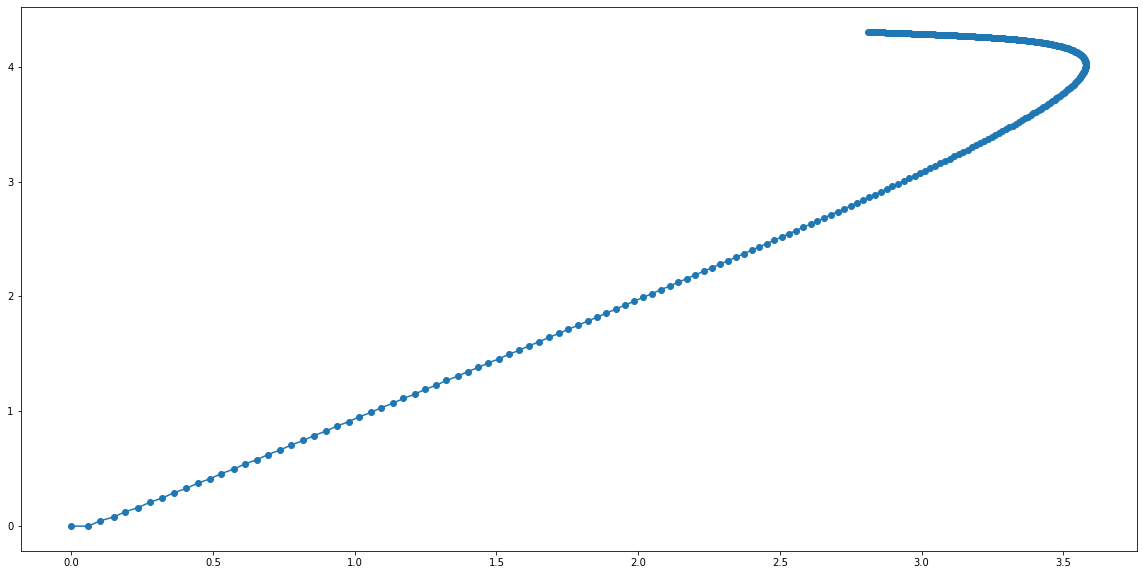

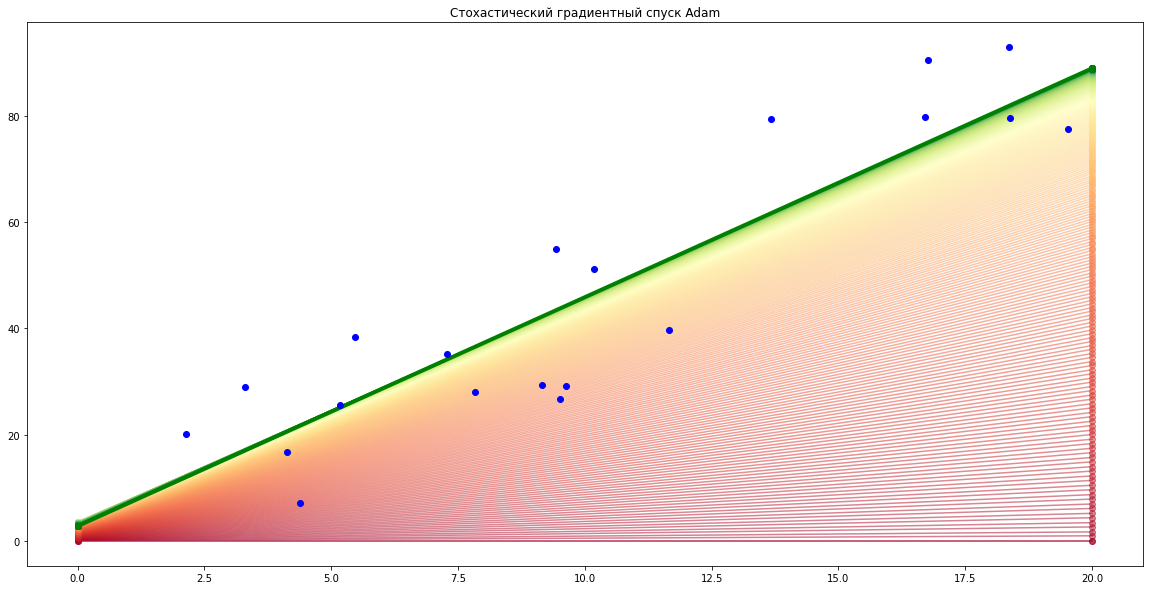

In [ ]:
M = 0
G = 0
beta = 0.9
beta2 = 0.999
A = np.zeros(n)
fGrad = fGradAdam
lr = 0.06
iter = 1000

start_time = process_time()
points, val = sgd_3(F, Y, A, fGrad, n, lr, batch, iter)
end_time = process_time()
adam_time = "{} seconds, {} iterations, {} on one iterations in middle".format(end_time - start_time, len(val), (end_time - start_time) / len(val))
print(adam_time)

adam = points
print(val[-min(10, len(val)):])
print(points[-min(10, len(points)):])

plt.plot(points[:, 0], points[:, 1], 'o-', )
plt.show()

for i in range(0, len(points)):
    plt.plot([0, 20], [points[i, 0], points[i, 0] + 20 * points[i, 1]], "o-", color=cm.RdYlGn(i / len(points)), alpha=0.5)
plt.title("Стохастический градиентный спуск Adam")
plt.plot([0, 20], [points[-1][0], points[-1][0] + 20 * points[-1][1]], "go-", linewidth=4)
plt.plot(F[:, 1], Y, "bo")
plt.show()

In [ ]:
print("Momentum:\n ", momentum_time.replace(',', ',\n'))
print("Nesterov:\n ", nesterov_time.replace(',', ',\n'))
print("Ada:\n", ada_time.replace(',', ',\n'))
print("Rms:\n", rms_time.replace(',', ',\n'))
print("Adam:\n", adam_time.replace(',', ',\n'))

Momentum:
  0.015674041000004024 seconds,
 95 iterations,
 0.00016498990526320025 on one iterations in middle
Nesterov:
  0.06816745100000077 seconds,
 307 iterations,
 0.00022204381433225004 on one iterations in middle
Ada:
 0.1311151680000009 seconds,
 594 iterations,
 0.00022073260606060756 on one iterations in middle
Rms:
 0.05012198599999351 seconds,
 207 iterations,
 0.0002421351980676015 on one iterations in middle
Adam:
 0.07460579300000347 seconds,
 314 iterations,
 0.00023759806687899195 on one iterations in middle


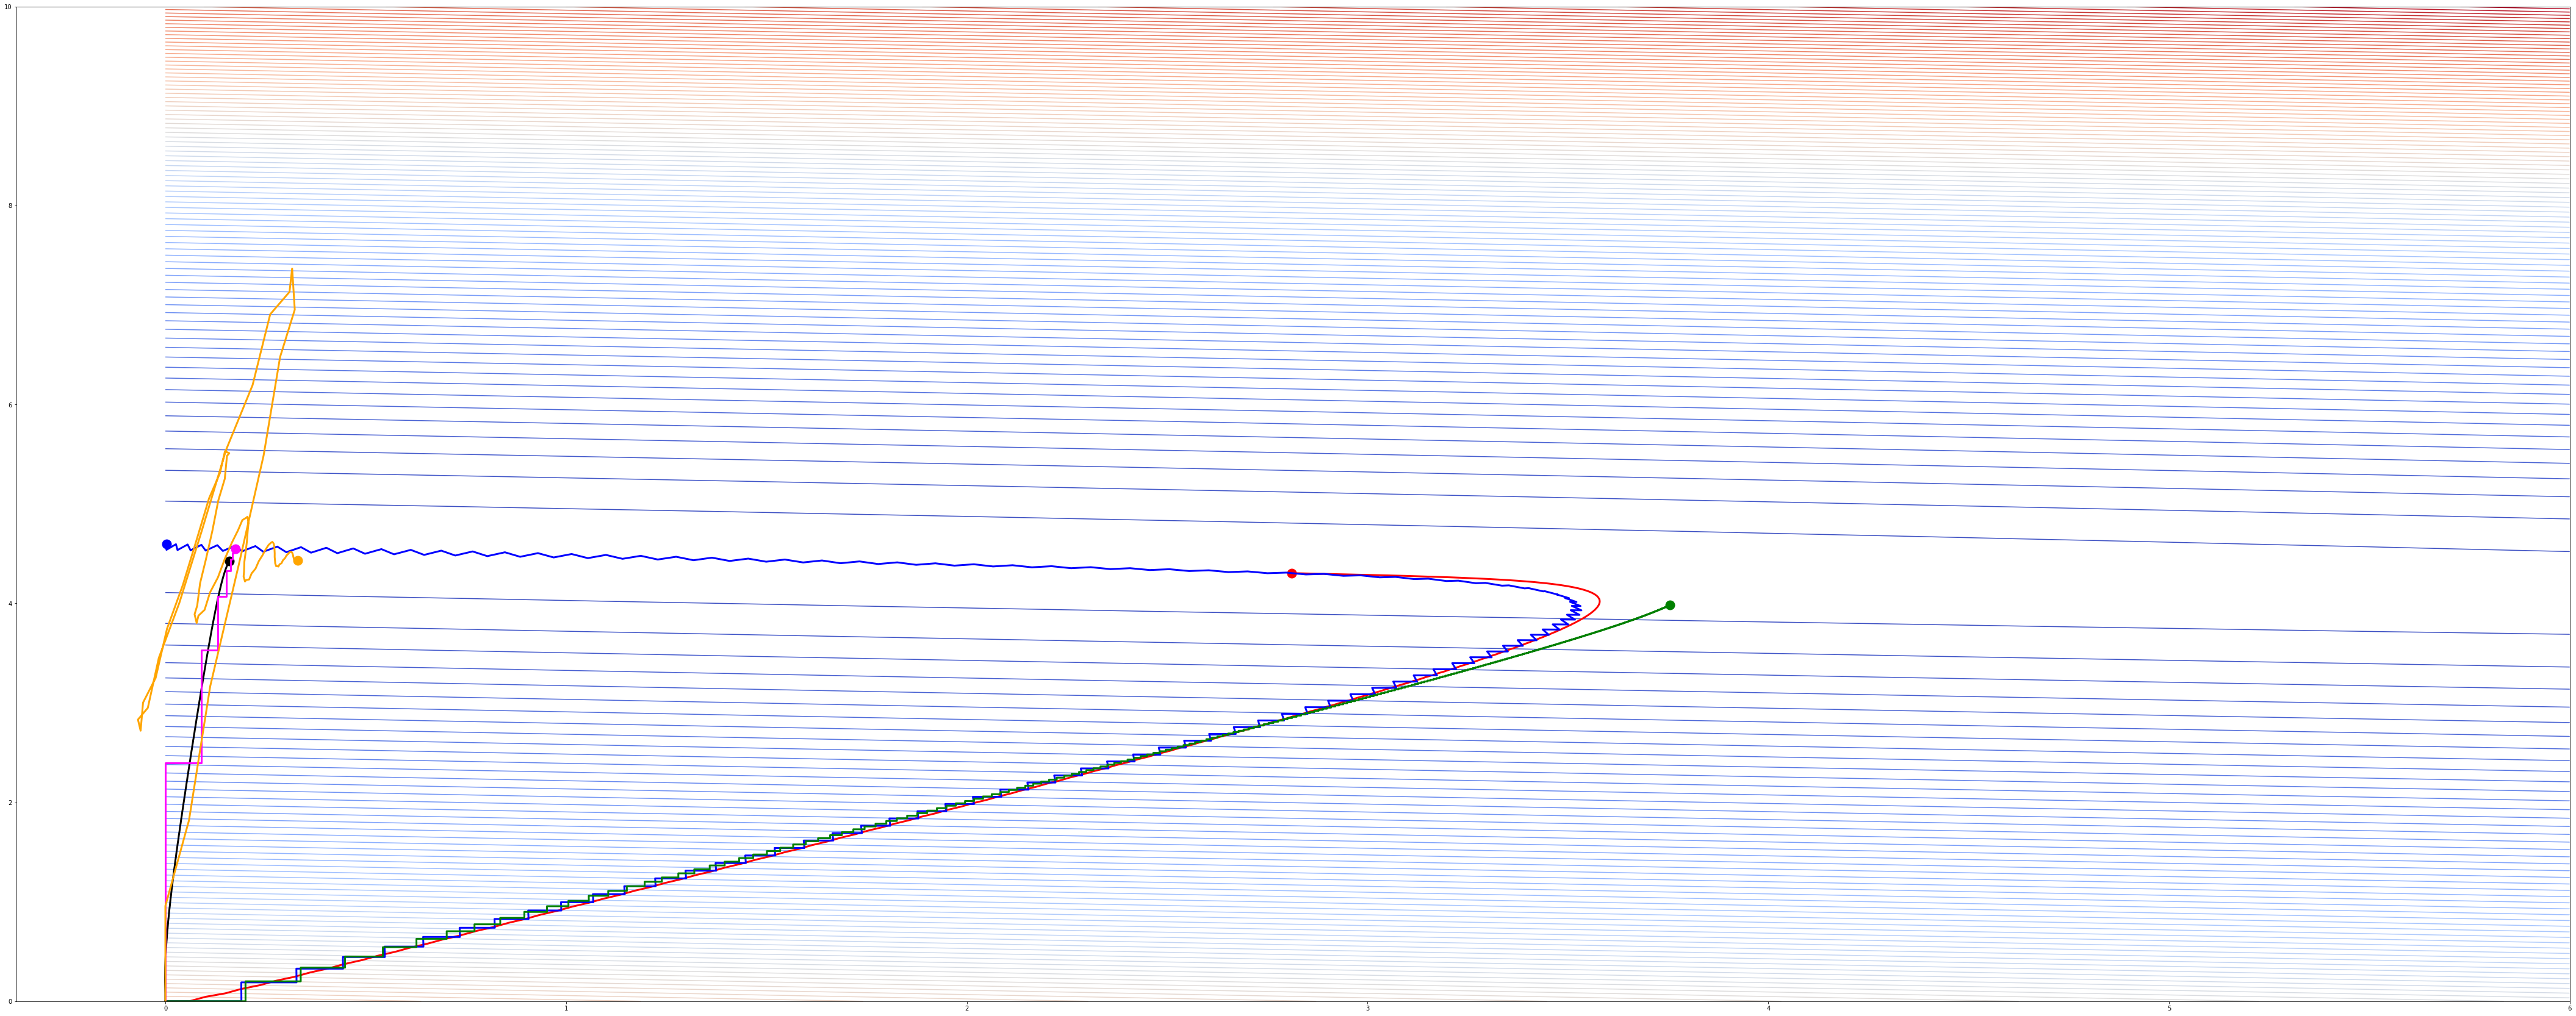

In [ ]:
IMGSZ = 3
t = np.linspace(0, 10, 200) 
t2 = np.linspace(0, 6, 100) 
X,YY = np.meshgrid(t2, t)
plt.figure(figsize=(25 * IMGSZ, 10 * IMGSZ))
plt.contour(X, YY, f(F, Y, [X, YY]), 100, cmap=cm.coolwarm)

plt.plot(adam[:, 0], adam[:, 1], '-', color="red", linewidth=3)
plt.plot(adam[-1, 0], adam[-1, 1], 'o', color="red", markersize=15)
plt.plot(rms[:, 0], rms[:, 1], '-', color="blue", linewidth=3)
plt.plot(rms[-1, 0], rms[-1, 1], 'o', color="blue", markersize=15)
plt.plot(ada[:, 0], ada[:, 1], '-', color="green", linewidth=3)
plt.plot(ada[-1, 0], ada[-1, 1], 'o', color="green", markersize=15)
plt.plot(nesterov[:, 0], nesterov[:, 1], '-', color="black", linewidth=3)
plt.plot(nesterov[-1, 0], nesterov[-1, 1], 'o', color="black", markersize=15)
plt.plot(nomod[:, 0], nomod[:, 1], '-', color="magenta", linewidth=3)
plt.plot(nomod[-1, 0], nomod[-1, 1], 'o', color="magenta", markersize=15)
plt.plot(momentum[:, 0], momentum[:, 1], '-', color="orange", linewidth=3)
plt.plot(momentum[-1, 0], momentum[-1, 1], 'o', color="orange", markersize=15)

# plt.title(title + "\n Minimum found: " + str(round(f(F, Y, planes[-1]), 10)))
plt.show()

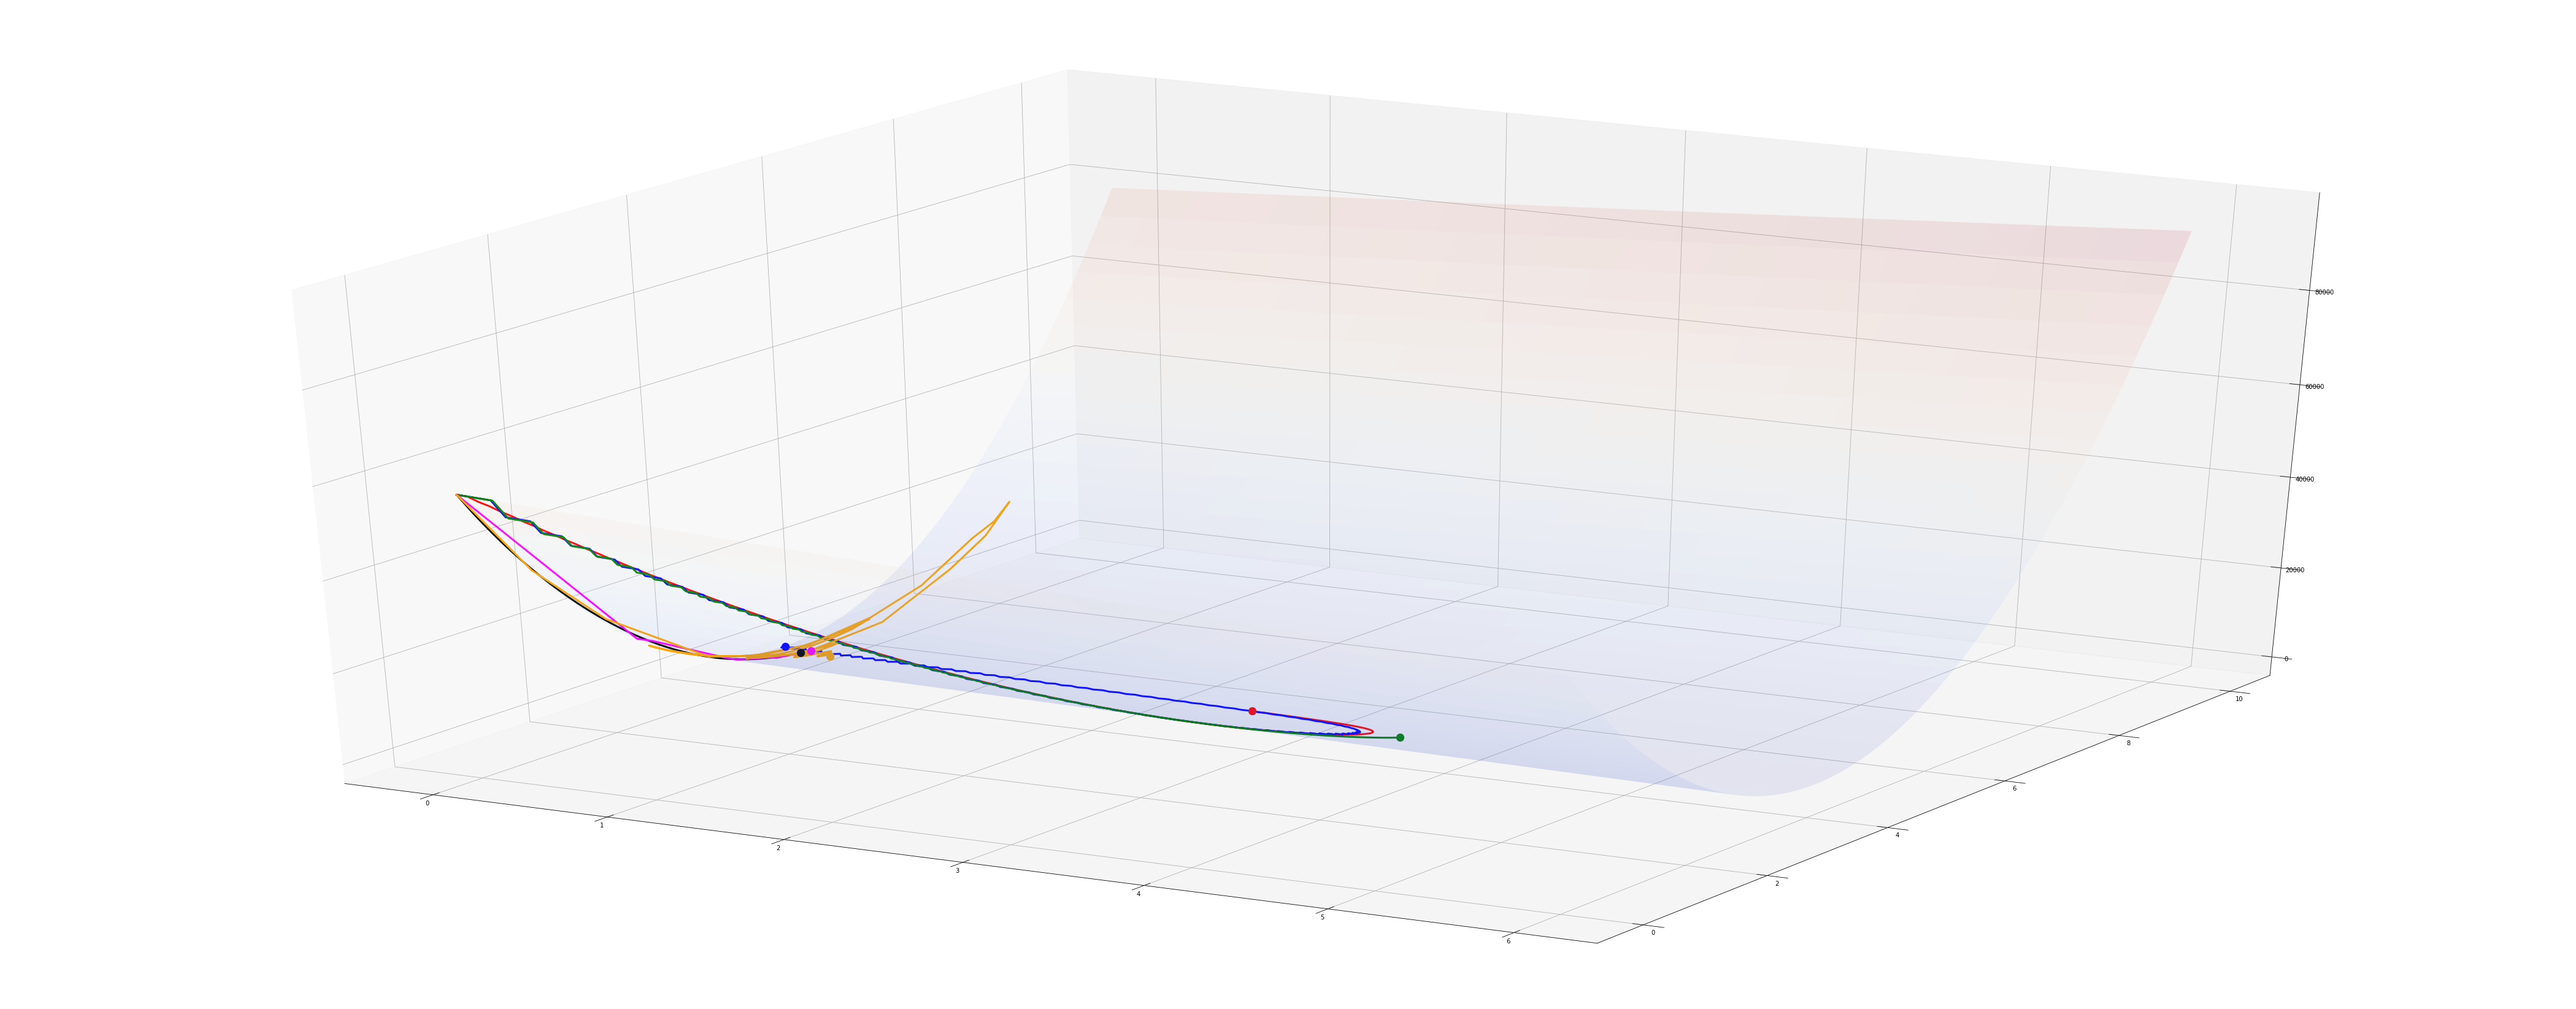

In [ ]:
def draw(ax, mem, color_new):
    plt.plot(mem[:, 0], mem[:, 1], f(F, Y, [mem[:, 0], mem[:, 1]]), '-', color=color_new, linewidth=3)
    ax.scatter3D(mem[-1, 0], mem[-1, 1], f(F, Y, [mem[-1, 0], mem[-1, 1]]), 'o', color=color_new, s=150)

fig = plt.figure(figsize=(25 * IMGSZ, 10 * IMGSZ))
t = np.linspace(0, 10, 1000)
t2 = np.linspace(0, 6, 1000)
X, YY = np.meshgrid(t2, t)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, YY, f(F, Y, [X, YY]), cmap=cm.coolwarm, alpha=0.1)
draw(ax, adam, "red")
draw(ax, rms, "blue")
draw(ax, ada, "green")
draw(ax, nesterov, "black")
draw(ax, nomod, "magenta")
draw(ax, momentum, "orange")